In [63]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mutual_info_score
import warnings 
warnings.filterwarnings('ignore')

In [64]:
d1=pd.read_csv('C:CSV/healthcare-dataset-stroke-data.csv')

In [65]:
d1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [66]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
d1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [68]:
d1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [69]:
d1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
#encoding for bmi, since there are more than 200 empty values
# Calculate the mean of the non-missing values in the column
mean_value = d1['bmi'].mean()

# Replace missing values with the mean
d1['bmi'] = d1['bmi'].fillna(mean_value)

In [71]:
d1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [72]:
#label encoding
le=LabelEncoder()

In [73]:
for col2 in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    d1[col2] = le.fit_transform(d1[col2])

In [74]:
#correlation Matrix
correlation_matrix=d1.corr()

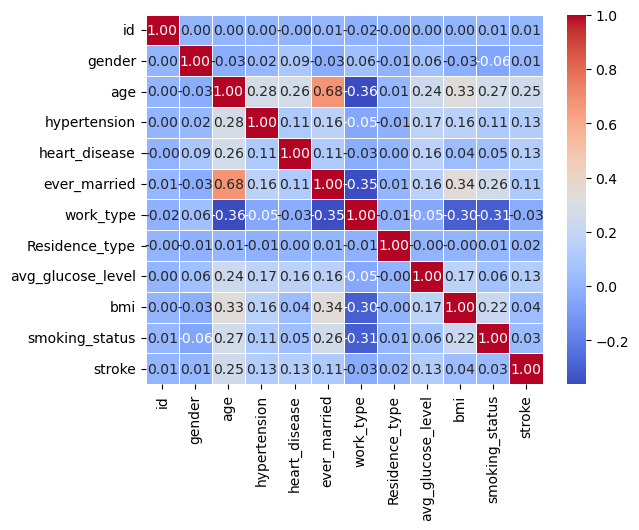

In [75]:
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.show()

It looks like there is not a lot of correlation weight between the features. It seems like the data is imbalanced. 

In [80]:
import plotly.express as px
fig = px.histogram(d1, x="stroke", title='Stroke', width=400, height=400)
fig.show()

In [81]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [82]:
d1[numerical].skew()


age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.076716
dtype: float64

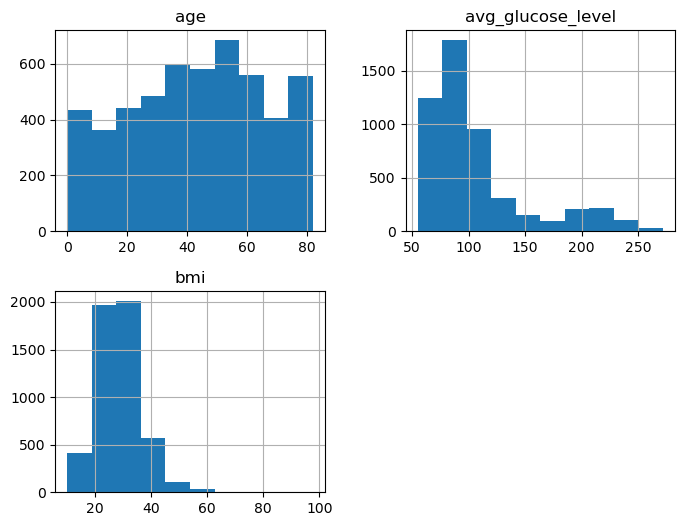

In [83]:
d1[numerical].hist(figsize=(8,6));

In [84]:
fig = px.histogram(d1, x="hypertension", color="stroke",width=400, height=400)
fig.show()

It seems like the data is highly imbalanced. 

In [85]:
skewness = d1.skew()

In [86]:
print(skewness)

id                  -0.019913
gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type           -0.308617
Residence_type      -0.032107
avg_glucose_level    1.572284
bmi                  1.076716
smoking_status      -0.039234
stroke               4.193284
dtype: float64


degree of dependency between a categorical variable and the target variable can be measured by using mutual info score

In [91]:
X=d1[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level',
   'smoking_status']]
y=d1['stroke']
mi_scores = [(feature, mutual_info_score(X[feature], y)) for feature in X.columns]

In [92]:
print(mi_scores)

[('gender', 5.082647986199315e-05), ('age', 0.04466742317990002), ('hypertension', 0.0059757021995566), ('heart_disease', 0.005896831562805259), ('ever_married', 0.006949777240345324), ('work_type', 0.006825427206957342), ('Residence_type', 0.00011964604564064507), ('avg_glucose_level', 0.1709044307986186), ('smoking_status', 0.002750494543529103)]


It means that gender, glucose level, age is the highest factor that has an affect on stroke variable. 

In [93]:
d1.groupby('stroke')[numerical].mean()

,age,avg_glucose_level,bmi
stroke,,,
0,41.971545,104.795513,28.825388
1,67.728193,132.544739,30.217789


In [101]:
d1[['age', 'avg_glucose_level', 'bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.325942,0.245257
avg_glucose_level,0.238171,1.000000,0.168751,0.131945
bmi,0.325942,0.168751,1.000000,0.038947
stroke,0.245257,0.131945,0.038947,1.000000


In [108]:
d1.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [109]:
d1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [112]:
X=d1[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level',
   'smoking_status']]
y=d1['stroke']

from sklearn.model_selection import train_test_split

X = d1.drop('stroke', axis=1)
y = d1['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [114]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9383561643835616

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



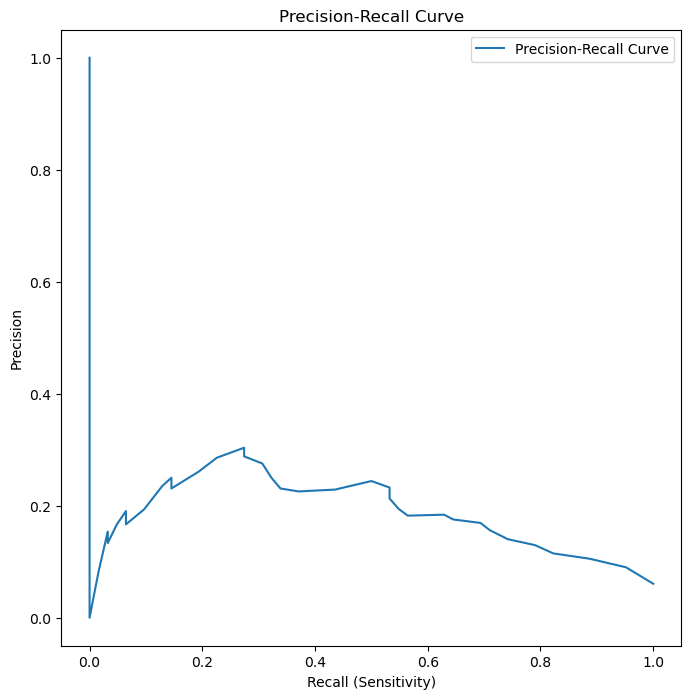

In [116]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.legend()
plt.show()
